In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyrsm as rsm

In [2]:
rsm.__version__ # should be 0.9.26 or higher

# run the below as needed
# %pip install --user pyrsm --upgrade

'0.9.26'

In [3]:
## setup pyrsm for autoreload when you edit code and save
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [4]:
facebook = pd.read_parquet("data/facebook.parquet")

In [5]:
rsm.md("data/facebook_description.md")

## Click-through on Facebook ads

## Variables

* click: Did the respondent click-through ("yes" or "no")
* age: Age of respondent
* gender: Respondent gender ("female" or "male")
* ad: Ad copy served ("A" or "B")

In [6]:
lr = rsm.model.logistic(
    {"facebook": facebook}, rvar="click", lev="yes", evar=["age", "gender", "ad"]
)
lr.summary()

Logistic regression (GLM)
Data                 : facebook
Response variable    : click
Level                : yes
Explanatory variables: age, gender, ad
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                   OR     OR%  coefficient  std.error  z.value p.value     
Intercept       0.009  -99.1%        -4.75      0.230  -20.640  < .001  ***
gender[female]  0.972   -2.8%        -0.03      0.092   -0.306    0.76     
ad[B]           0.861  -13.9%        -0.15      0.092   -1.632   0.103     
age             1.050    5.0%         0.05      0.005    9.127  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.021
Pseudo R-squared (McFadden adjusted): 0.019
Area under the RO Curve (AUC): 0.615
Log-likelihood: -1961.675, AIC: 3931.351, BIC: 3960.192
Chi-squared: 82.212, df(3), p.value < 0.001 
Nr obs: 10,000


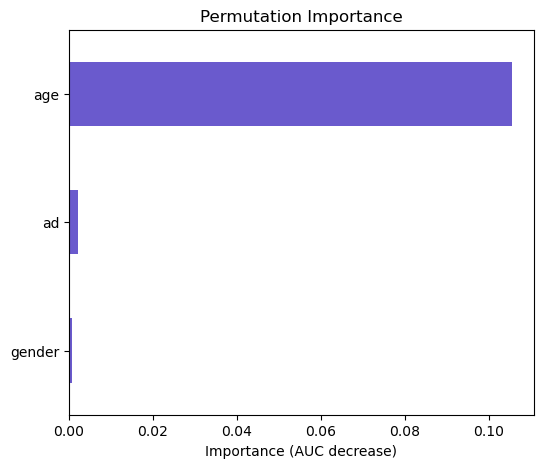

In [7]:
lr.plot("vimp")

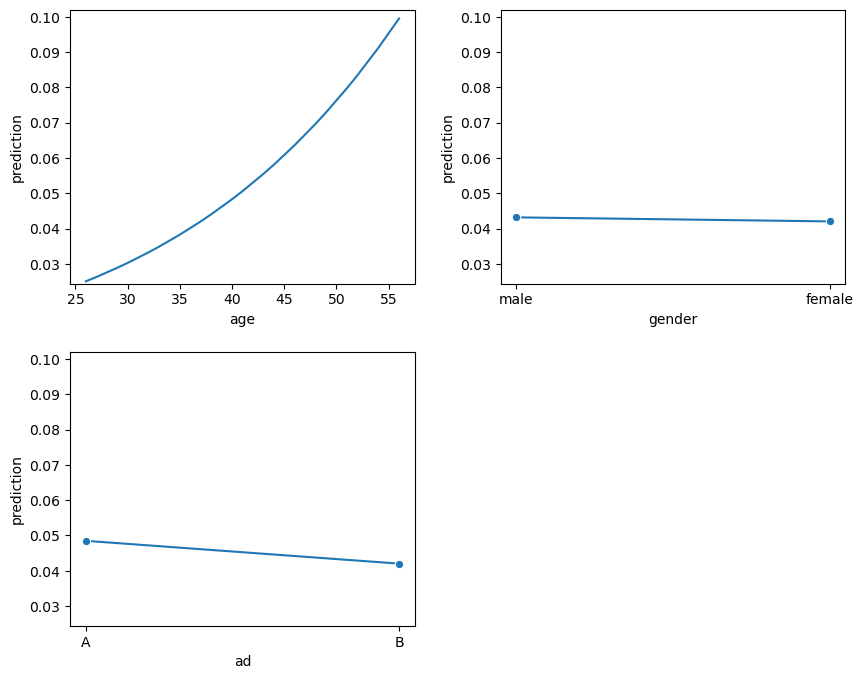

In [8]:
lr.plot("pred")

In [9]:
facebook["pred_logit"] = lr.predict(facebook)["prediction"]

Always standardize the data before fitting a neural network. Make sure to also use that same standardized data in your predictions.

> Note: It is **not** necessary to standardize data when using logistic regression. We only use standardized data with logistic regression to evaluate the relative importance of different explanatory variables

> Note: for large neural networks I recommend using
relu as the activation function. However, in smaller
nets, "tanh" offers additional flexibility with fewer
hidden nodes and layers

In [10]:
rsm.model.mlp?

Init signature:
rsm.model.mlp(
    data: pandas.core.frame.DataFrame | polars.dataframe.frame.DataFrame | dict[str, pandas.core.frame.DataFrame | polars.dataframe.frame.DataFrame],
    rvar: Optional[str] = None,
    lev: Optional[str] = None,
    evar: Optional[list[str]] = None,
    hidden_layer_sizes: tuple = (5,),
    activation: Literal['identity', 'logistic', 'tanh', 'relu'] = 'tanh',
    solver: Literal['lbfgs', 'sgd', 'adam'] = 'lbfgs',
    alpha: float = 0.0001,
    batch_size: float | str = 'auto',
    learning_rate_init: float = 0.001,
    max_iter: int = 10000,
    random_state: int = 1234,
    mod_type: Literal['regression', 'classification'] = 'classification',
    **kwargs,
) -> None
Docstring:     
Initialize Multi-layer Perceptron (NN) model

Parameters
----------
data: pandas DataFrame; dataset
lev: String; name of the level in the response variable
rvar: String; name of the column to be used as the response variable
evar: List of strings; contains the names of the co

In [11]:
nnc1 = rsm.model.mlp(
    {"facebook": facebook},
    rvar="click",
    lev="yes",
    evar=["age", "gender", "ad"],
    mod_type="classification",
    hidden_layer_sizes=(1,),
    alpha=0.0001,
)
nnc1.summary()

Multi-layer Perceptron (NN)
Data                 : facebook
Response variable    : click
Level                : yes
Explanatory variables: age, gender, ad
Model type           : classification
Nr. of features      : (3, 3)
Nr. of observations  : 10,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.615

Raw data             :
 age gender ad
  41   male  A
  46 female  B
  26 female  A
  47   male  B
  46 female  B

Estimation data      :
      age  gender_female  ad_B
 0.400535          False False
 1.028059           True  True
-1.482034           True False
 1.153563          False  True
 1.028059           True  True


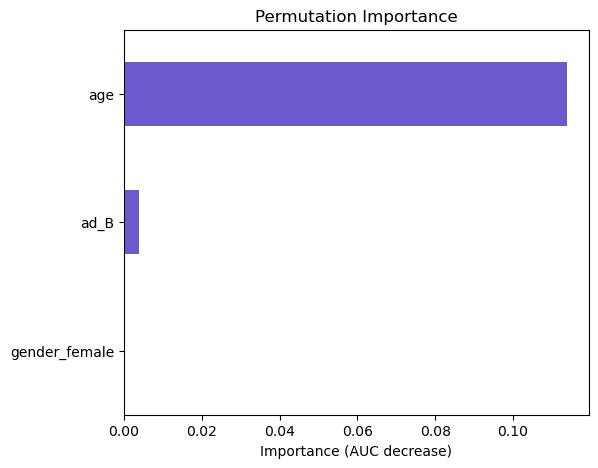

In [12]:
nnc1.plot("vimp")

In [13]:
facebook["pred_nnc1"] = nnc1.predict(facebook)["prediction"]

In [14]:
rsm.model.mlp?

Init signature:
rsm.model.mlp(
    data: pandas.core.frame.DataFrame | polars.dataframe.frame.DataFrame | dict[str, pandas.core.frame.DataFrame | polars.dataframe.frame.DataFrame],
    rvar: Optional[str] = None,
    lev: Optional[str] = None,
    evar: Optional[list[str]] = None,
    hidden_layer_sizes: tuple = (5,),
    activation: Literal['identity', 'logistic', 'tanh', 'relu'] = 'tanh',
    solver: Literal['lbfgs', 'sgd', 'adam'] = 'lbfgs',
    alpha: float = 0.0001,
    batch_size: float | str = 'auto',
    learning_rate_init: float = 0.001,
    max_iter: int = 10000,
    random_state: int = 1234,
    mod_type: Literal['regression', 'classification'] = 'classification',
    **kwargs,
) -> None
Docstring:     
Initialize Multi-layer Perceptron (NN) model

Parameters
----------
data: pandas DataFrame; dataset
lev: String; name of the level in the response variable
rvar: String; name of the column to be used as the response variable
evar: List of strings; contains the names of the co

In [15]:
nnc2 = rsm.model.mlp(
    {"facebook": facebook},
    rvar="click",
    lev="yes",
    evar=["age", "gender", "ad"],
    mod_type="classification",
    hidden_layer_sizes=(2,),
    alpha=0.0001,
)
nnc2.summary()

Multi-layer Perceptron (NN)
Data                 : facebook
Response variable    : click
Level                : yes
Explanatory variables: age, gender, ad
Model type           : classification
Nr. of features      : (3, 3)
Nr. of observations  : 10,000
Hidden_layer_sizes   : (2,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.678

Raw data             :
 age gender ad
  41   male  A
  46 female  B
  26 female  A
  47   male  B
  46 female  B

Estimation data      :
      age  gender_female  ad_B
 0.400535          False False
 1.028059           True  True
-1.482034           True False
 1.153563          False  True
 1.028059           True  True


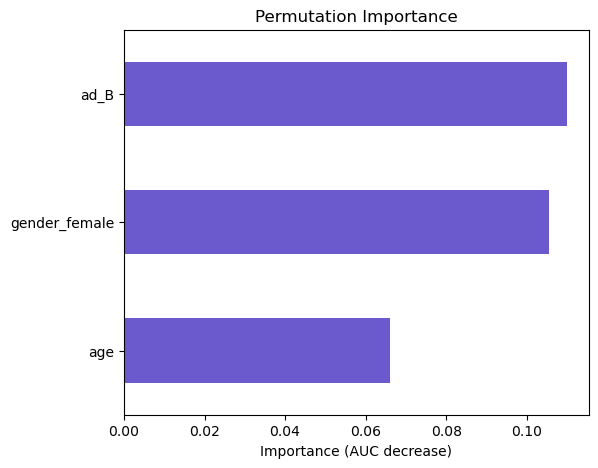

In [16]:
nnc2.plot("vimp")

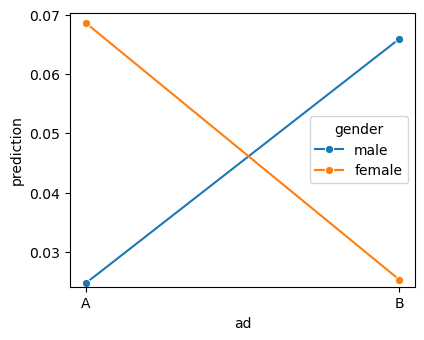

In [17]:
nnc2.plot("pred", incl=[], incl_int="ad:gender")

In [18]:
lr_int = rsm.model.logistic(
    {"facebook": facebook},
    rvar="click",
    lev="yes",
    evar=["age", "gender", "ad"],
    ivar="ad:gender"
)
lr_int.summary()

Logistic regression (GLM)
Data                 : facebook
Response variable    : click
Level                : yes
Explanatory variables: age, gender, ad
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                         OR     OR%  coefficient  std.error  z.value p.value     
Intercept             0.005  -99.5%        -5.40      0.251  -21.504  < .001  ***
gender[female]        2.780  178.0%         1.02      0.147    6.967  < .001  ***
ad[B]                 2.410  141.0%         0.88      0.146    6.033  < .001  ***
ad[B]:gender[female]  0.128  -87.2%        -2.05      0.205  -10.019  < .001  ***
age                   1.050    5.0%         0.05      0.005    9.091  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.049
Pseudo R-squared (McFadden adjusted): 0.047
Area under the RO Curve (AUC): 0.676
Log-likelihood: -1905.561, AIC: 3821.122, BIC: 3857.174
Chi-squared: 194.44, df(4), p

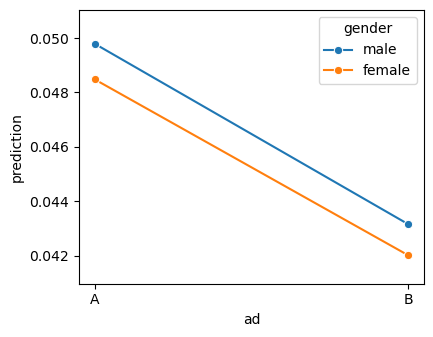

In [19]:
lr.plot("pred", incl=[], incl_int="ad:gender")

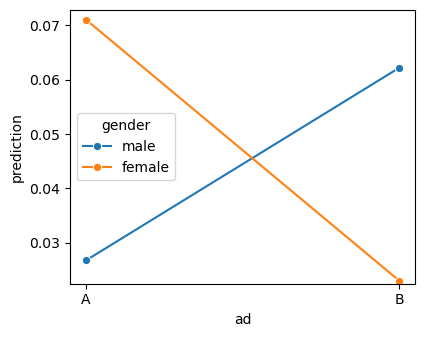

In [20]:
lr_int.plot("pred", incl=[], incl_int="ad:gender")

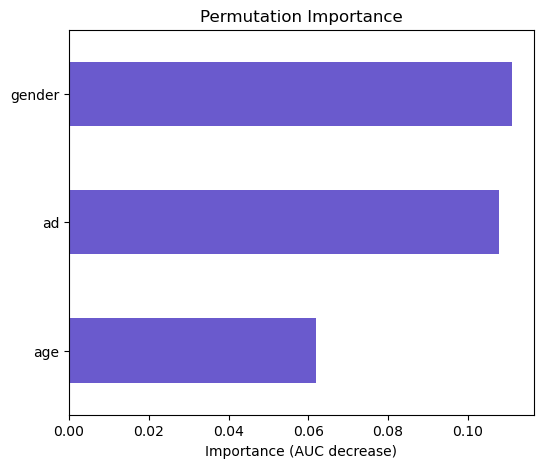

In [21]:
lr_int.plot("vimp")

In [22]:
facebook["pred_nnc2"] = nnc2.predict(facebook)["prediction"]

In [23]:
facebook["pred_logit_int"] = lr_int.predict(facebook)["prediction"]

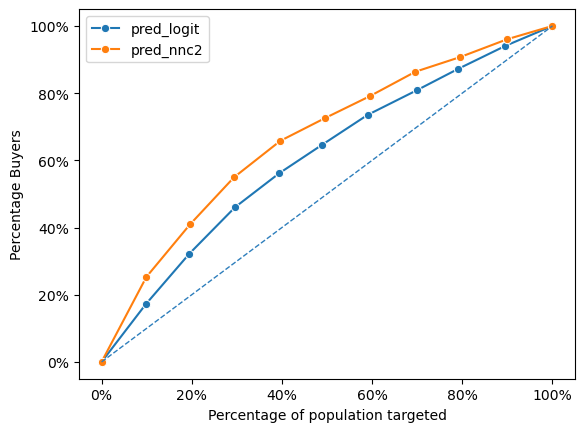

In [24]:
fig = rsm.gains_plot(facebook, "click", "yes", ["pred_logit", "pred_nnc2"])